In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
from sklearn import preprocessing
from scipy import stats
np.random.seed(42) # random seed (no need to change)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn import preprocessing,decomposition,pipeline, linear_model,model_selection
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_validate,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"interview_train.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,58.823646,-18.241937,1.866662,5.833761,15.130008,1.642258,11.758063,2.0,NaN,26.867067,-0.021777,-8.031511,-0.117370,-0.266671,13.016848,1
1,52.551639,-20.064912,5.054654,11.387807,17.716504,-0.330837,9.935088,2.0,NaN,26.275198,0.864626,-9.037340,-0.548082,-1.785894,11.421745,0
2,60.768702,-17.028259,1.363104,9.184857,19.713831,0.695023,12.971741,1.2,NaN,25.995478,-0.883687,-7.326470,-3.513362,255.367290,1.914841,1
3,57.502629,-18.370123,5.786992,8.678447,17.324103,0.054830,11.629877,2.0,NaN,25.379681,3.653936,-8.280616,-0.478535,-0.091932,0.846251,0
4,54.289886,-20.612612,4.111855,5.311783,11.784938,-0.381139,9.387388,1.2,NaN,25.264155,-1.035961,-9.032595,-0.155815,1.133195,0.157444,0


### 3. Investigate data set

In [3]:
print(df.shape)
print(df.isnull().sum())

(1000, 16)
x1       0
x2       0
x3       0
x4       0
x5       0
x6      63
x7       0
x8       0
x9     735
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
y        0
dtype: int64


In [4]:
X = df.loc[:,df.columns!='y'].copy()
y = df.loc[:,df.columns=='y'].copy()

Describe the data

In [5]:
res_tab = []
for ele in X.columns:
    tmp = stats.describe(X.loc[:,ele],nan_policy='omit')
    res_tab.append([X.shape[0]-X.loc[:,ele].isnull().sum(),tmp.minmax[0],tmp.minmax[1],tmp.mean,np.sqrt(tmp.variance),tmp.skewness,tmp.kurtosis])

pd.DataFrame(data=np.array(res_tab).transpose(),index=['count','min','max','mean','std','skewness','kurtosis'],\
columns = X.columns)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,937.000000,1000.000000,1000.000000,265.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
min,32.035514,-27.680643,0.000033,2.926154,7.079793,-3.993603,2.319357,1.200000,-3.129580,21.834448,-34.336048,-12.245161,-19.035415,-97.323977,0.001737
max,69.394357,-14.054994,9.999924,17.630790,23.946604,3.096196,30.000000,2.000000,2.791327,28.590873,29.418402,-5.613954,20.295658,1001.112662,862.126671
mean,51.226585,-20.881416,4.832816,10.098842,15.491984,-0.020995,9.673701,1.365600,-0.033215,25.216229,-0.046510,-9.274415,0.009653,18.946208,7.504225
std,5.905043,2.102348,3.303812,2.366095,2.441169,0.966177,3.920086,0.324287,1.099754,1.008447,1.920539,1.052472,1.859621,106.689676,40.510954
skewness,0.022823,0.057057,0.049237,-0.013420,-0.001804,-0.157821,3.518305,1.446358,-0.145397,0.045535,-2.127727,0.088331,-0.004181,5.982044,16.009115
kurtosis,-0.207901,-0.050603,-1.417429,0.065384,-0.221041,0.209403,16.100112,0.091952,-0.219400,0.089704,155.438381,-0.018239,28.973478,36.882267,298.279972


In [7]:
X_scaled = pd.DataFrame(data=preprocessing.scale(X),columns=X.columns)
res_tab = []
for ele in X.columns:
    tmp = stats.describe(X_scaled.loc[:,ele],nan_policy='omit')
    res_tab.append([X_scaled.shape[0]-X_scaled.loc[:,ele].isnull().sum(),tmp.minmax[0],tmp.minmax[1],tmp.skewness,tmp.kurtosis])

pd.DataFrame(data=np.array(res_tab).transpose(),index=['count','min','max','skewness','kurtosis'],\
columns = X.columns)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,937.000000,1000.000000,1000.000000,265.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
min,-3.251572,-3.235729,-1.463522,-3.032963,-3.447692,-4.113873,-1.877006,-0.510915,-2.820836,-3.355133,-17.863057,-2.824050,-10.246494,-1.090343,-0.185289
max,3.078193,3.248671,1.564766,3.184875,3.465082,3.228038,5.187761,1.957273,2.573201,3.348052,15.349679,3.479706,10.914135,9.210431,21.106639
skewness,0.022823,0.057057,0.049237,-0.013420,-0.001804,-0.157821,3.518305,1.446358,-0.145397,0.045535,-2.127727,0.088331,-0.004181,5.982044,16.009115
kurtosis,-0.207901,-0.050603,-1.417429,0.065384,-0.221041,0.209403,16.100112,0.091952,-0.219400,0.089704,155.438381,-0.018239,28.973478,36.882267,298.279972


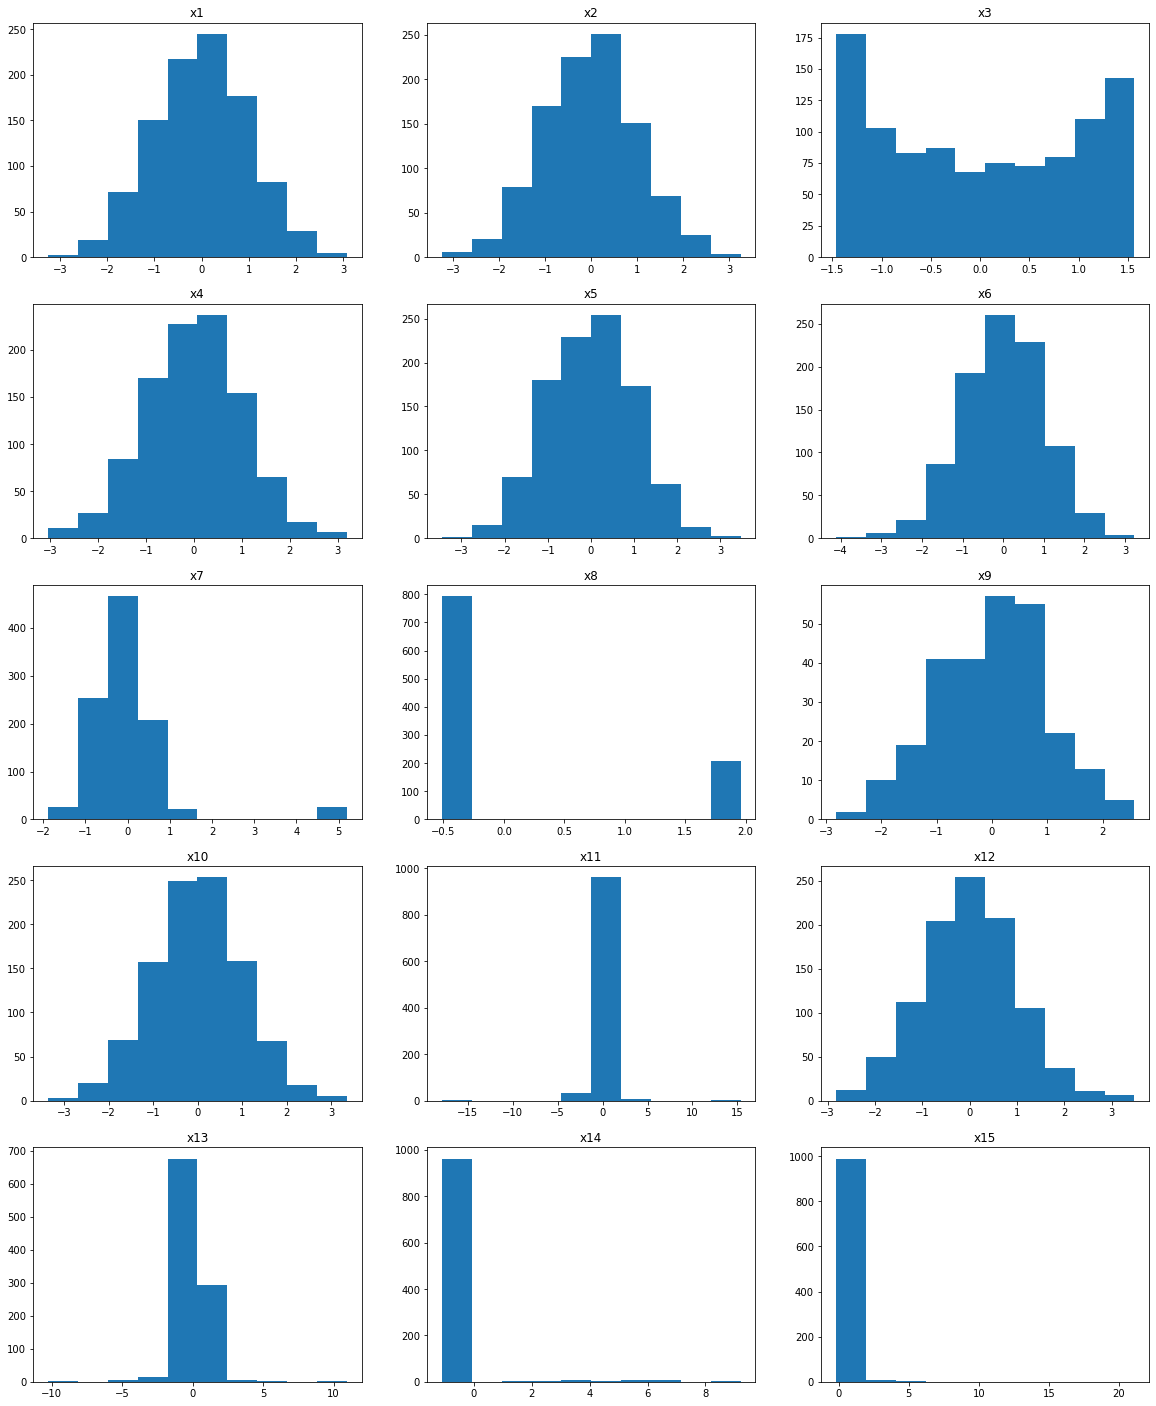

In [8]:
plt.figure(figsize=(20,25))
for idx,ele in enumerate(X.columns):
    plt.subplot(5,3,idx+1)
    plt.hist(X_scaled.loc[:,ele])
    plt.gca().set_title(ele)
    
plt.show()

In [9]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
x1,1.00,0.88,0.01,-0.61,0.59,-0.01,0.41,0.00,0.03,0.80,-0.00,0.78,0.04,-0.03,0.05,0.34
x2,0.88,1.00,-0.01,-0.54,0.63,0.02,0.49,-0.02,0.03,0.84,-0.00,0.91,0.04,-0.03,0.07,0.32
x3,0.01,-0.01,1.00,-0.02,-0.02,-0.05,-0.01,0.01,0.07,0.03,-0.06,-0.01,-0.04,0.00,-0.05,-0.06
x4,-0.61,-0.54,-0.02,1.00,0.25,0.02,-0.26,-0.03,0.02,-0.52,0.01,-0.49,-0.01,0.05,0.02,-0.27
x5,0.59,0.63,-0.02,0.25,1.00,0.02,0.29,-0.04,0.06,0.51,0.01,0.57,0.05,0.02,0.09,0.16
x6,-0.01,0.02,-0.05,0.02,0.02,1.00,-0.01,-0.02,-0.03,0.01,-0.03,0.01,-0.01,-0.04,0.02,0.11
x7,0.41,0.49,-0.01,-0.26,0.29,-0.01,1.00,-0.05,0.01,0.41,-0.01,0.44,0.02,-0.01,0.02,0.11
x8,0.00,-0.02,0.01,-0.03,-0.04,-0.02,-0.05,1.00,0.02,0.01,0.05,-0.01,-0.02,0.03,-0.01,-0.02
x9,0.03,0.03,0.07,0.02,0.06,-0.03,0.01,0.02,1.00,0.01,0.07,0.04,-0.11,-0.08,0.02,-0.02
x10,0.80,0.84,0.03,-0.52,0.51,0.01,0.41,0.01,0.01,1.00,0.01,0.70,0.05,-0.06,0.07,0.26


The dimension of the dataset is 1000 by 16. In another words, there are 1000 samples and for each samples, there are 15 input variables and 1 output variable. For datatype,
each input variables are floatnumber and output y bool variable. Output is imbalance as there are 20.5% of datasamples are 1 and others 0. As for each input variable, based
on description statistics, we can see that
left skewness : x4,x6,x9,x11,
no skewness (threshold~10^(-3)): x5,x13 right skewness: x1,x2,x3,x7,x8,x10,x12,x14,x15
x14 and x15 are high right skewness as the skewness
are as high as 5.98 and 16.00.
Kurtosis: Mesokurtic: x1,x2,x3,x4,x5,x6, x8,x9,x10,x12
Leptokurtic: x7,x11,x13,x14,x15
Based on the hisogram we plotted on each individual input variables, we find that Wide bell-shape curve: x1,x2,x4,x5,x6,x9,x10,x12
Narrow bell-shape curve: x11,x13 Multimode:
x3,x7,x8
Fat/long tail: x14,x15
Based on the correlation table we obtain, we can see that x1,x2,x10,x12 demonstrates high and positive correlation with each other, with correlation coefficient at least 0.783.
x5 and x7 show a medium level correlation with {x1,x2,x10,x12}. x4 demonstrates a noticeable negative correlation with {x1,x2,x10,x12}.
For correlation between input variable and y, we can see that the first few input variable wit high absolute correlation coefficient are x1 (0.34),x12 (0.33),x2 (0.32),x4
(-0.27),x10 (0.26),x5 (0.16),x7 (0.11),x6 (0.11).

### 4. Process data set

In [12]:
print(df.isnull().sum())

x1       0
x2       0
x3       0
x4       0
x5       0
x6      63
x7       0
x8       0
x9     735
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
y        0
dtype: int64


In [13]:
missing_cols = ['x6']
for col in missing_cols:
    imp = IterativeImputer(max_iter = 50, random_state=0)
    cols = [col] + ['x2','x3','x4','x5','x8','x10','x11','x12','x14','x15']
    imp.fit(df[cols])
    df.loc[:,col] = imp.transform(df[cols])[:, 0]
    
df.drop(columns="x9", inplace = True)

There are two variables that contain missing values x6 and x9. To handle missing data, there are mainly two ways. The first one is to throw out all the row with missing data.
However, we will not use this method because there are a large portion of rows containing missing values. We do ignore the variable with too many missing value (in our
case, x9) as the reason be discussed later. Another way to handle missing data is to do reasonable interpolations based on other variables available. Instead of using
SimpleImputer function built in from sklearn by filling in the mean or median along each column, we use IterativeImputer which allows me to estimate each feature from all
the others relevant variables. There are many other ways to do the regression, treating every missing variable as an output to predict such as regularized linear regression,
non-linear regression, extratreeregressor or KNN imputation. However, due to time limits, we will not dive into comparation or selections of any imputation schemes and just
call the IterativeImputer and let the program itself to decide.
To fill the missing value for x6, 'x2','x3','x4','x5','x8','x10','x11','x12','x14','x15' will be used for imputation process as
those input variables has high correlation with x6 (roughly ~10^(-2)).
x9 is deleted as there are more than 73.5% of missing data and the correlations with any other input
variables and output y are very small, i.e. maximum 0.0702 and -0.0239 with y.

### 5. Build your machine learning model

In [14]:
X = df.loc[:,df.columns!='y'].copy()
y = df.loc[:,df.columns=='y'].copy().values.ravel()

GaussianNB()
Accuracy on test data: 0.7895733333333274 ; Accuracy on train data: 0.7972442857142837
Precision on test data: 0.4897425351116208 ; Precision on train data: 0.5068375502758345
Recall on test data: 0.5177074107291855 ; Recall on train data: 0.5378189949328726
F1 score on test data: 0.500332002989427 ; F1 score on train data: 0.5206153001887749

LogisticRegression()
Accuracy on test data: 0.8357533333333419 ; Accuracy on train data: 0.8443071428571423
Precision on test data: 0.685909322275089 ; Precision on train data: 0.7215590912674292
Recall on test data: 0.37491578967303846 ; Recall on train data: 0.39139213315660176
F1 score on test data: 0.48062489476850306 ; F1 score on train data: 0.5067086927088872

DecisionTreeClassifier()
Accuracy on test data: 0.7822066666666602 ; Accuracy on train data: 1.0
Precision on test data: 0.4709331185168768 ; Precision on train data: 1.0
Recall on test data: 0.48682298877766705 ; Recall on train data: 1.0
F1 score on test data: 0.475942

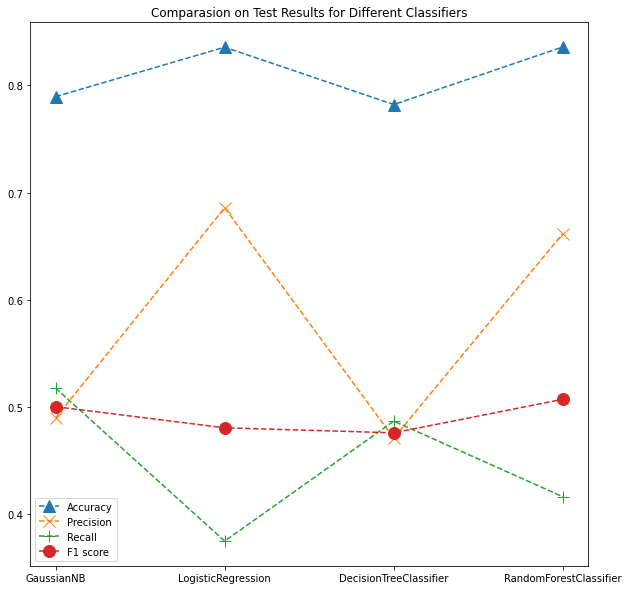

In [16]:
# build your machine learning model here
List_Classifiers = [ GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=13)]
total_res = []
for clf_each in List_Classifiers:
    clf = clf_each
    res = np.array([[0,0],[0,0],[0,0],[0,0]])*1.0
    rep_size = 1000
    for iter_ in range(rep_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=iter_)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        res[0][0] =res[0][0]+ accuracy_score(y_test, y_pred_test)
        res[0][1] =res[0][1]+ accuracy_score(y_train, y_pred_train)
        res[1][0] =res[1][0]+ precision_score(y_test, y_pred_test)
        res[1][1] =res[1][1]+ precision_score(y_train, y_pred_train)
        res[2][0] =res[2][0]+ recall_score(y_test, y_pred_test)
        res[2][1] =res[2][1]+ recall_score(y_train, y_pred_train)
        res[3][0] =res[3][0]+ f1_score(y_test, y_pred_test)
        res[3][1] =res[3][1]+ f1_score(y_train, y_pred_train)
    res = res/rep_size
    total_res+=[res]
    print(str(clf))
    print("Accuracy on test data:",res[0][0], "; Accuracy on train data:",res[0][1] )
    print("Precision on test data:",res[1][0], "; Precision on train data:",res[1][1] )
    print("Recall on test data:",res[2][0], "; Recall on train data:",res[2][1] )
    print("F1 score on test data:",res[3][0], "; F1 score on train data:",res[3][1] )
    print('')
acc = [ele[0][0] for ele in total_res]
pre = [ele[1][0] for ele in total_res]
rec = [ele[2][0] for ele in total_res]
f1s = [ele[3][0] for ele in total_res]
plt.figure(figsize=(10,10))
plt.plot([1,2,3,4],acc,'^--',markersize=12)
plt.plot([1,2,3,4],pre,'x--',markersize=12)
plt.plot([1,2,3,4],rec,'+--',markersize=12)
plt.plot([1,2,3,4],f1s,'o--',markersize=12)
plt.xticks([1,2,3,4],["GaussianNB","LogisticRegression","DecisionTreeClassifier","RandomForestClassifier"])
plt.gca().set_title('Comparasion on Test Results for Different Classifiers')
plt.legend(['Accuracy','Precision','Recall','F1 score'],loc='best')
plt.show()

We test four different classifiers Gaussian naive Bayes, logistic regression, decision tree classifier and random forest classifier and set the setting as default setting (except
RandomForestClassifier). To evaluate the binary classifiers, several metrics are taken into account. While there are many metrics that can be used to measure the
performance of a classifier, there are four basic combinations of actual data category and assigned category: true positives (tp), true negatives (tn), false positives (fp) and
false negatives(fn). Hence, the following four metrics are considered here:
* accuracy = $\frac{tp+tn}{tp+tn+fp+fn}$
* precision = $\frac{tp}{tp+fn}$
* recall = $\frac{tp}{tp+fn}$
* f1 score = $\frac{2}{\text{recall}^{-1}+\text{precision}^{-1}}$


For each classifier, we repeat the fitting process 1000 times and every time we randomly separate data into train ($70\%$) and test ($30\%$) dataset. The average (over
1000 repetitions) metrics are calculated for train and test data. However, for the plot (metrics vs. classifiers) is shown only under test dataset. By taking into account all four
metrics, random forrest classifier apparently demonstrates a dominant performance overall. It beats the other three in terms of accuracy, f1 score and has a high enough
precision. Even though logistic classifier has the highest precision, it has inferior score in recall compared with logistic regression. Moreover, random forrest allows us to
further model refinement for better performance. Therefore, we take random forrest as our model for further exploration (base model).


In the remainder of model implementation and evaluation, we use cross validation to detect overfitting issues and evaluate
out-of-sample prediction performance. Random grid search and finer grid search are conducted to find sophisticated
classification model over baseline model.

In [18]:
########Cross Validation
scoring = {'accuracy' : make_scorer(accuracy_score),
'precision' : make_scorer(precision_score),
'recall' : make_scorer(recall_score),
'f1_score' : make_scorer(f1_score)}
kfold = model_selection.KFold(n_splits=5,shuffle=True, random_state=47)
clf = RandomForestClassifier(n_estimators=13)
results = cross_validate(clf,X,y,cv=kfold,scoring=scoring,return_train_score=True,n_jobs=-1)
for key in scoring.keys():
    print('test_'+key.upper()+": %0.3f (+/- %0.3f)" % (results['test_'+key].mean(), results['test_'+key].std() * 2)+' '+\
    'train_'+key.upper()+": %0.3f (+/- %0.3f)" % (results['train_'+key].mean(), results['train_'+key].std() * 2))

test_ACCURACY: 0.850 (+/- 0.073) train_ACCURACY: 0.994 (+/- 0.007)
test_PRECISION: 0.717 (+/- 0.126) train_PRECISION: 0.998 (+/- 0.006)
test_RECALL: 0.465 (+/- 0.113) train_RECALL: 0.973 (+/- 0.032)
test_F1_SCORE: 0.562 (+/- 0.104) train_F1_SCORE: 0.985 (+/- 0.018)


We follow a two-step improvement. The first is random grid search with cross validation and second is fine grid search. By
using RandomizedSearchCV, we define a grid of hyperparameter ranges and randomly sample from grid, performing 5-fold
cross validation. The hyperparameters we select are n_estimators, max_features, max_depth, min_samples_split,
min_samples_leaf, as these are the most important settings claimed in many literatures or reports. After $20$ iterations of
random grid search, we select{'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None,
'max_depth': 10} as the optimal parameter considering all four metrices.

In [19]:
#########RandomGridSearch
n_estimators = [5,13,30,50,75,100,150]
max_features = ['auto','log2',None]
max_depth = [5,10,20,50,100,None]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
random_grid = {'n_estimators':n_estimators,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_samples_leaf}
rf = RandomForestClassifier()
rf_random =RandomizedSearchCV(estimator = clf, param_distributions = random_grid,n_iter=20,n_jobs=5,\
cv=kfold,scoring=scoring,refit=False,return_train_score=True)
rf_random.fit(X,y)
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=True),
                   estimator=RandomForestClassifier(n_estimators=13), n_iter=20,
                   n_jobs=5,
                   param_distributions={'max_depth': [5, 10, 20, 50, 100, None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 13, 30, 50, 75, 100,
                                                         150]},
                   refit=False, return_train_score=True,
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'f1_score': make_scorer(f1_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)})

In [21]:
for ele in ['rank_test_accuracy','rank_test_precision','rank_test_recall','rank_test_f1_score']:
    print(rf_random.cv_results_[ele])

[ 7 17 13 13 15  5 20  9 19 12  1  3  3 15  2 11  6 18 10  7]
[ 2  3 19 12 20  7 17 16  8 18 11  9 10  6  1 13  4 14 15  5]
[15 19  4 16  5 10 18  2 20  3  1  9  6 17 13  7 12 14  8 11]
[14 18  5 15  6 10 19  2 20  4  1  7  3 17 12  8 13 16 11  9]


#### We pick the setting with the high rank overall. Based on the result, we pick the last setting

In [22]:
rf_random_optimal_setting = rf_random.cv_results_['params'][-1]
print(rf_random_optimal_setting)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [23]:
clf = RandomForestClassifier(**rf_random_optimal_setting)
results = cross_validate(clf,X,y,cv=kfold,scoring=scoring,return_train_score=True)
for key in scoring.keys():
    print('test_'+key.upper()+": %0.3f (+/- %0.3f)" % (results['test_'+key].mean(), results['test_'+key].std() * 2)+' '+\
    'train_'+key.upper()+": %0.3f (+/- %0.3f)" % (results['train_'+key].mean(), results['train_'+key].std() * 2))

test_ACCURACY: 0.851 (+/- 0.068) train_ACCURACY: 0.981 (+/- 0.008)
test_PRECISION: 0.736 (+/- 0.118) train_PRECISION: 0.999 (+/- 0.005)
test_RECALL: 0.440 (+/- 0.171) train_RECALL: 0.906 (+/- 0.047)
test_F1_SCORE: 0.545 (+/- 0.144) train_F1_SCORE: 0.950 (+/- 0.026)


Grid Search: The second step is a finer grid search with cross validation. With the set of hyperparameters
we found above, we can focus on finer ranges of hyperparameters by grid search.
Specifically, we focus on different choice of n_estimators.

In [24]:
fit_params = [{'n_estimators': 73, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10},
{'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10},
{'n_estimators': 68, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10},
{'n_estimators': 77, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10},
{'n_estimators': 79, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10},
{'n_estimators': 81, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
]

for fit_param in fit_params:
    clf = RandomForestClassifier(**fit_param)
    results = cross_validate(clf,X,y,cv=kfold,scoring=scoring,return_train_score=True)
    print(fit_param)
    for key in scoring.keys():
        print('test_'+key.upper()+": %0.3f (+/- %0.3f)" % (results['test_'+key].mean(), results['test_'+key].std() * 2)+' '+\
        'train_'+key.upper()+": %0.3f (+/- %0.3f)" % (results['train_'+key].mean(), results['train_'+key].std() * 2))

{'n_estimators': 73, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
test_ACCURACY: 0.856 (+/- 0.069) train_ACCURACY: 0.956 (+/- 0.006)
test_PRECISION: 0.709 (+/- 0.059) train_PRECISION: 0.965 (+/- 0.009)
test_RECALL: 0.521 (+/- 0.193) train_RECALL: 0.814 (+/- 0.039)
test_F1_SCORE: 0.595 (+/- 0.132) train_F1_SCORE: 0.883 (+/- 0.026)
{'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
test_ACCURACY: 0.849 (+/- 0.065) train_ACCURACY: 0.956 (+/- 0.004)
test_PRECISION: 0.694 (+/- 0.108) train_PRECISION: 0.968 (+/- 0.018)
test_RECALL: 0.493 (+/- 0.156) train_RECALL: 0.809 (+/- 0.040)
test_F1_SCORE: 0.572 (+/- 0.110) train_F1_SCORE: 0.881 (+/- 0.020)
{'n_estimators': 68, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
test_ACCURACY: 0.856 (+/- 0.072) train_ACCURACY: 0.956 (+/- 0.003)
test_PRECISION: 0.715 (+/- 0.088) train_PRECISION: 0.961 (+/- 0.004)
test_RECALL

In [25]:
###We pick the best
# {'n_estimators': 79, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
# test_ACCURACY: 0.850 (+/- 0.059) train_ACCURACY: 0.956 (+/- 0.007)
# test_PRECISION: 0.678 (+/- 0.203) train_PRECISION: 0.959 (+/- 0.020)
# test_RECALL: 0.505 (+/- 0.154) train_RECALL: 0.819 (+/- 0.029)
# test_F1_SCORE: 0.574 (+/- 0.149) train_F1_SCORE: 0.884 (+/- 0.016)
#The final model is
fit_param = {'n_estimators': 79, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}

### 6. Model evaluation

show your model performance here

In [26]:
base_line_res = np.array([0.834,0.664,0.301,0.495])
random_gs_res = np.array([0.839,0.645, 0.462,0.533])
gs_res = np.array([0.850,0.678,0.505,0.574])

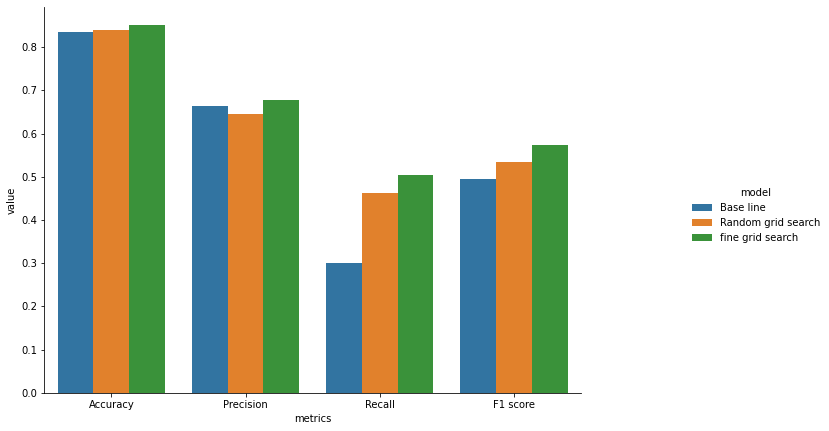

Improve over baseline on accuracy:  1.6 %
Improve over baseline on precision:  1.4 %
Improve over baseline on recall:  20.4 %
Improve over baseline on f1 score:  7.9 %


In [27]:
InteractiveShell.ast_node_interactivity = 'last_expr'
columns = ['metrics','Base line','Random grid search','fine grid search']
mat = [['Accuracy',base_line_res[0],random_gs_res[0],gs_res[0]],\
['Precision',base_line_res[1],random_gs_res[1],gs_res[1]],\
['Recall',base_line_res[2],random_gs_res[2],gs_res[2]],\
['F1 score',base_line_res[3],random_gs_res[3],gs_res[3]]]
res_mat = pd.DataFrame(mat,columns= columns)
res_mat= pd.melt(res_mat, id_vars="metrics", var_name="model", value_name="value")
sns.catplot(x='metrics', y='value', hue='model', data=res_mat, kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.show()
base_line_res = np.array([0.834,0.664,0.301,0.495])
gs_res = np.array([0.850,0.678,0.505,0.574])
improve = (gs_res-base_line_res)*100
print("Improve over baseline on accuracy: ", np.round(improve[0],2),'%')
print("Improve over baseline on precision: ", np.round(improve[1],2),'%')
print("Improve over baseline on recall: ", np.round(improve[2],2),'%')
print("Improve over baseline on f1 score: ", np.round(improve[3],2),'%')

### 7. Final comments

In [28]:
clf = RandomForestClassifier(**fit_param)
clf.fit(X,y)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       n_estimators=79)

In [29]:
for i,j in zip(X.columns[np.argsort(-clf.feature_importances_)],-np.sort(-clf.feature_importances_)):
    print(i,' ',j)

x15   0.30333496074286437
x12   0.1391046560188089
x1   0.11562224400462932
x14   0.09180607674253509
x4   0.05897348006198888
x6   0.05362762591479088
x2   0.04492396842632241
x3   0.04060149370526166
x11   0.039437906153796914
x13   0.03349597025016815
x5   0.03218713522337364
x10   0.029872631733165046
x7   0.01555614616205512
x8   0.0014557048602396765


Conclusion: A thorough exploratory data analysis is conducted. A handling of missing data are both
given. We consider four metrics: accuracy, precision, recall, f1 score. We find that random forest
achieving best performance and we further construct random forest with customized hyperparameters.
In the end, we use the fitted random forrest model to find features of most importances. Three promising
features are x15,x12,x1.